In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest

# The dataset

The data obtained from Goodreads website is available in the csv file *books.csv* and contains the following attributes:

- **bookID**: a unique identification number;
- **title**: the name of the book;
- **authors**: includes the names of the authors, as well as other people involved in the making of the book such as illustrators and editors;
- **average_rating**: an average of the ratings given to the book by the Goodread users;
- **isbn**: the International Standard Book Number is a 10-digit unique commmercial book identifier, used until 2007;
- **isbn13**: 13-digit ISBN, assigned after 2007;
- **language_code**: the language in which the book was written;
- **num_pages**: the number of book pages;
- **ratings_count**: how many times the book was rated by users;
- **text_reviews_count**: how many written reviews has the book received;
- **publication_date**: date the book was published;
- **publisher**: name of the publisher.

Since the comma was used as column delimiter, the original csv file "books.csv" was edited to ensure that there were no commas within cells. Issues were found in lines 3350, 4704, 5879, 8981 of the **author** column. For example, "Sam Bass Warner, Jr" had to be modified to "Sam Bass Warner Jr" in the new file "books_edited.csv" to prevent an error when reading the table.

***

Reading the dataset:

In [2]:
df = pd.read_csv("books_edited.csv",sep=",",index_col="bookID")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11127 entries, 1 to 45641
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               11127 non-null  object 
 1   authors             11127 non-null  object 
 2   average_rating      11127 non-null  float64
 3   isbn                11127 non-null  object 
 4   isbn13              11127 non-null  int64  
 5   language_code       11127 non-null  object 
 6     num_pages         11127 non-null  int64  
 7   ratings_count       11127 non-null  int64  
 8   text_reviews_count  11127 non-null  int64  
 9   publication_date    11127 non-null  object 
 10  publisher           11127 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 1.0+ MB


***
The columns headers are the following:

In [4]:
df.columns

Index(['title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code',
       '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

To clean the headers, the function strip() is used. For example, '   num_pages' becomes only 'num_pages'.

In [5]:
df.columns = df.columns.str.strip()

In [6]:
df.columns 

Index(['title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code',
       'num_pages', 'ratings_count', 'text_reviews_count', 'publication_date',
       'publisher'],
      dtype='object')

***
First ten rows of the dataset:

In [7]:
df.head(10)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,en-US,152,19,1,4/26/2005,Nimble Books
10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic
12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3628,254,11/1/2005,Gramercy Books
13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,0345453743,9780345453747,eng,815,249558,4080,4/30/2002,Del Rey Books


***
Number of duplicated rows:

In [8]:
df.duplicated().sum()

0

***
There are no missing values.

In [9]:
df.isna().sum()

title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

## Numerical data

### ISBN

Identification numbers such as **isbn** and **isbn13** are attributes that should not have any impact on the ratings of the book. 

Therefore, these columns will not be used in this analysis and in our machine learning model. 

Dropping **isbn**, **isbn13**:

In [10]:
df = df.drop(columns=["isbn","isbn13"])

In [11]:
df

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...
45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,eng,512,156,20,12/21/2004,Da Capo Press
45633,You Bright and Risen Angels,William T. Vollmann,4.08,eng,635,783,56,12/1/1988,Penguin Books
45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,eng,415,820,95,8/1/1993,Penguin Books


### Ratings count

In [12]:
df.sort_values(by='ratings_count', ascending=False)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,
41865,Twilight (Twilight #1),Stephenie Meyer,3.59,eng,501,4597666,94265,9/6/2006,Little Brown and Company
5907,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,eng,366,2530894,32871,8/15/2002,Houghton Mifflin
5107,The Catcher in the Rye,J.D. Salinger,3.80,eng,277,2457092,43499,1/30/2001,Back Bay Books
960,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,eng,736,2418736,21303,4/1/2006,Pocket Books
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
...,...,...,...,...,...,...,...,...,...
44705,The Leadership Challenge: Skills for Taking Ch...,Warren G. Bennis,0.00,eng,60,0,0,12/1/1985,AMR/Advanced Management Reports
26410,Wissenschaft der Logik: Die Lehre Vom Begriff ...,Georg Wilhelm Friedrich Hegel,4.78,ger,337,0,0,1/1/1994,F. Meiner
12346,Premières Histoires,João Guimarães Rosa,4.33,fre,205,0,0,3/31/1995,Métailié


Sorting the books by **average_rating**, one can see that both top and bottom books have very low **ratings_count**.

In [13]:
df.sort_values(by='average_rating', ascending=False)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,
20957,Colossians and Philemon: A Critical and Exeget...,R. McL. Wilson,5.0,eng,512,1,0,12/7/2005,T&T Clark Int'l
4287,Middlesex Borough (Images of America: New Jersey),Middlesex Borough Heritage Committee,5.0,eng,128,2,0,3/17/2003,Arcadia Publishing
20954,Winchester Shotguns,Dennis Adler/R.L. Wilson,5.0,eng,372,2,0,5/15/2008,Chartwell Books
25426,Delwau Duon: Peintiadau Nicholas Evans = Symph...,Nicholas Evans/Rhonda Evans,5.0,wel,150,1,0,6/22/1987,Y Lolfa
17830,Bulgakov's the Master and Margarita: The Text ...,Elena N. Mahlow,5.0,eng,202,4,0,1/1/1975,Vantage Press
...,...,...,...,...,...,...,...,...,...
24749,American Writers Supplement VIII,Jay Parini/August Wilson,0.0,eng,400,0,0,5/1/2001,Gale Cengage
34889,Brown's Star Atlas: Showing All The Bright Sta...,Brown Son & Ferguson,0.0,eng,49,0,0,5/1/1977,Brown Son & Ferguson Ltd.
41044,Day and Night,Better Homes and Gardens,0.0,eng,32,0,1,3/1/1989,Meredith Corporation


One can see on the graphs below that the **ratings_count** distribution is very skewed.

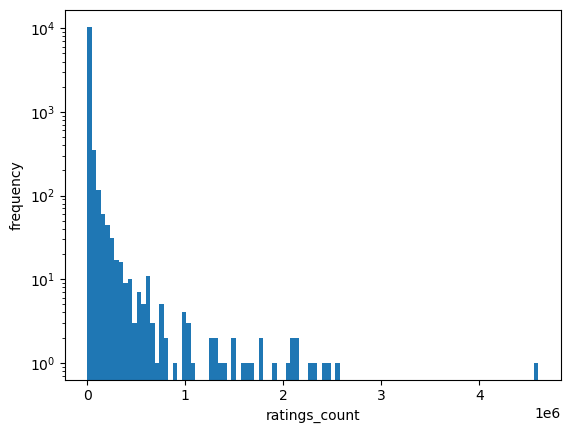

In [14]:
counts, bins = np.histogram(df.ratings_count, bins=100)
ax = plt.hist(bins[:-1], bins, weights=counts)
plt.xlabel('ratings_count')
plt.ylabel('frequency')
plt.yscale('log')

In [15]:
df.ratings_count.median()

745.0

A book needs to have at **ratings_count** > 0 for a rating to be given. However, some books have **ratings_count** = 0

In [16]:
len(df[df.ratings_count  == 0])

81

Percentage of total data:

In [17]:
percentage_data = len(df[df.ratings_count  == 0])/len(df)*100
percentage_data

0.7279590186033971

In [18]:
df[df.ratings_count  == 0]

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,
797,Lonely Planet Londres,Lonely Planet/Sarah Johnstone/Tom Masters,4.03,spa,480,0,0,5/1/2006,Geoplaneta
799,Out to Eat London 2002 (Lonely Planet Out to Eat),Lonely Planet/Mark Honan,0.00,eng,295,0,0,9/1/2001,Lonely Planet
1302,Juiced Official Strategy Guide,Doug Walsh,0.00,eng,112,0,0,6/1/2005,BradyGames
1658,American Government: Continuity and Change Al...,Karen O'Connor/Larry J. Sabato,2.83,eng,664,0,0,3/11/2005,Longman Publishing Group
1664,Essentials of American and Texas Government: C...,Karen O'Connor/Larry J. Sabato,3.50,eng,854,0,0,7/29/2005,Longman Publishing Group
...,...,...,...,...,...,...,...,...,...
42863,Mission Possible,Kenneth H. Blanchard,3.44,eng,242,0,0,4/30/1999,McGraw-Hill Companies
44321,A Cargo of Women: Susannah Watson and the Conv...,Babette Smith,3.58,eng,264,0,0,6/1/2005,Rosenberg Publishing
44433,Courageous Faith Through the Year,Bill Hybels/Keri Wyatt Kent,3.50,eng,327,0,0,7/1/2004,IVP Books


Books with zero ratings by users are dropped.  

In [19]:
df=df[df.ratings_count  > 0]

In [20]:
len(df[df.ratings_count  == 0])

0

***
Books with the highest **ratings_count**:

In [21]:
df.sort_values(by='ratings_count', ascending=False).head(10)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,
41865,Twilight (Twilight #1),Stephenie Meyer,3.59,eng,501,4597666,94265,9/6/2006,Little Brown and Company
5907,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,eng,366,2530894,32871,8/15/2002,Houghton Mifflin
5107,The Catcher in the Rye,J.D. Salinger,3.80,eng,277,2457092,43499,1/30/2001,Back Bay Books
960,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,eng,736,2418736,21303,4/1/2006,Pocket Books
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
15881,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPré,4.42,eng,341,2293963,34692,6/2/1999,Arthur A. Levine Books / Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
34,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.36,eng,398,2128944,13670,9/5/2003,Houghton Mifflin Harcourt
7613,Animal Farm,George Orwell/Boris Grabnar/Peter Škerl,3.93,eng,122,2111750,29677,5/6/2003,NAL


### Number of pages

The smallest **num_pages** found in the data set is:

In [22]:
min(df.num_pages)

0

It will be assumed that the books have **at least one page**. The instances with **num_pages** = 0 seem to correspond to audiobooks, based on the publishers' names (Random House Audio, BBC Audiobooks, AudioGO, etc.)



In [23]:
df[df.num_pages == 0]

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,
955,The 5 Love Languages / The 5 Love Languages Jo...,Gary Chapman,4.70,eng,0,22,4,1/1/2005,Moody Publishers
2835,The Tragedy of Pudd'nhead Wilson,Mark Twain/Michael Prichard,3.79,eng,0,3,0,1/1/2003,Tantor Media
3593,Murder by Moonlight & Other Mysteries (New Adv...,NOT A BOOK,4.00,eng,0,7,2,10/3/2006,Simon Schuster Audio
3599,The Unfortunate Tobacconist & Other Mysteries ...,NOT A BOOK,3.50,eng,0,12,1,10/1/2003,Simon & Schuster Audio
4249,The Da Vinci Code (Robert Langdon #2),Dan Brown/Paul Michael,3.84,eng,0,91,16,3/28/2006,Random House Audio
...,...,...,...,...,...,...,...,...,...
40378,The Chessmen of Mars (Barsoom #5),Edgar Rice Burroughs/John Bolen,3.83,eng,0,5147,157,1/1/2005,Tantor Media
41273,Fine Lines (One-Eyed Mack #6),Jim Lehrer,3.23,eng,0,17,4,11/19/1995,Random House Value Publishing
43343,Stowaway and Milk Run: Two Unabridged Stories ...,Mary Higgins Clark/Jan Maxwell,3.49,eng,0,64,2,12/1/1999,Simon & Schuster Audio


In [24]:
len(df[df.num_pages == 0])

75

All books with less than 20 pages seem to be audiobooks.

In [25]:
df[df.num_pages <20]

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,
16,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams/Stephen Fry,4.22,eng,6,1266,253,3/23/2005,Random House Audio
68,The Known World,Edward P. Jones/Kevin R. Free,3.83,en-US,14,55,12,6/15/2004,HarperAudio
524,Lord of the Flies,William Golding,3.68,eng,6,408,96,10/11/2005,Listening Library (Audio)
955,The 5 Love Languages / The 5 Love Languages Jo...,Gary Chapman,4.70,eng,0,22,4,1/1/2005,Moody Publishers
966,Angeles & Demonios,Dan Brown/Raúl Amundaray,3.89,spa,18,65,7,12/1/2005,FonoLibro
...,...,...,...,...,...,...,...,...,...
44979,Howards End,E.M. Forster/Nadia May,3.96,eng,9,32,16,6/1/2007,Blackstone Audiobooks
45161,The Roald Dahl Audio Collection,Roald Dahl,4.41,en-US,4,199,36,2/20/2007,HarperCollins Publishers
45465,Artemis Fowl (Artemis Fowl #1),Eoin Colfer/Nathaniel Parker,3.84,eng,6,55,14,4/6/2004,Listening Library


Percentage of total data:

In [26]:
percentage_data = len(df[df.num_pages  < 20])/len(df)*100
percentage_data

2.4352706862212568

Dropping rows in which **num_pages** < 20.


In [27]:
df=df[df.num_pages > 20]

***

The distribution of **num_pages** is skewed to higher values, as observed below. Therefore, not all points outside the boxplot can be considered outliers. A closer look on books with very **num_pages** is needed.

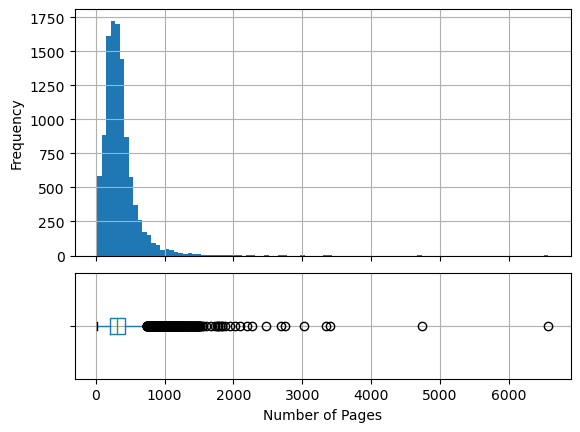

In [28]:
fig, ax = plt.subplots(2, sharex=True, # Common x-axis
                       gridspec_kw={"height_ratios": (.7, .3)}) 
#Boxplot
df.boxplot('num_pages',vert=False, ax=ax[1])
#Histogram
df.hist('num_pages',bins=100, ax=ax[0])
ax[0].set_ylabel('Frequency')
ax[1].set_xlabel('Number of Pages')
ax[0].set_title('')
plt.yticks([1], [''])
plt.subplots_adjust(hspace=0.1) ##Adjust gap between the two plots

All entries with **num_pages** larger than 1700 are either book sets, the complete work of an author or a study Bible, which explains the large number of pages. These entries will be kept in the dataset for now.

In [29]:
df[df['num_pages']>1700].sort_values(by='num_pages', ascending = False)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,
24520,The Complete Aubrey/Maturin Novels (5 Volumes),Patrick O'Brian,4.70,eng,6576,1338,81,10/17/2004,W. W. Norton Company
25587,The Second World War,Winston S. Churchill/John Keegan,4.45,eng,4736,1493,99,5/9/1986,Mariner Books
44613,Remembrance of Things Past (Boxed Set),Marcel Proust/C.K. Scott Moncrieff/Frederick A...,4.34,eng,3400,6,1,3/5/1981,Chatto & Windus
10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,eng,3342,28242,808,9/12/2005,Scholastic
25709,Summa Theologica 5 Vols,Thomas Aquinas,4.12,eng,3020,2734,84,1/1/1981,Christian Classics
30258,Harrison's Principles of Internal Medicine,Dennis L. Kasper/Dan L. Longo/Stephen L. Hause...,4.35,eng,2751,23,4,7/27/2004,McGraw-Hill Medical Publishing
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,9/13/2004,Scholastic
43888,The Sword of Truth Boxed Set I: Wizard's Firs...,Terry Goodkind,4.29,en-US,2480,4196,81,11/15/1998,Tor Books
23589,The J.R.R. Tolkien Companion and Guide,Christina Scull/Wayne G. Hammond,4.64,eng,2264,45,0,11/2/2006,Houghton Mifflin Harcourt


The median value of **num_pages** is:

*Due to the skewness of the curve, it makes more sense to look at the median value of number of pages than the mean.*

In [30]:
df.num_pages.median()

304.0

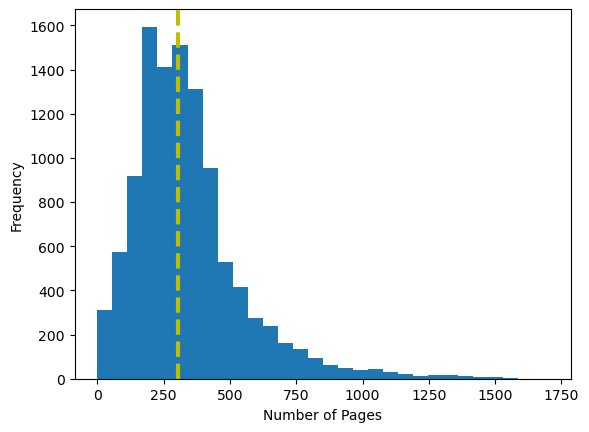

In [31]:
counts, bins = np.histogram(df.num_pages, range=[0,1700], bins=30)
ax = plt.hist(bins[:-1], bins, weights=counts)
plt.xlabel('Number of Pages')
plt.ylabel('Frequency')
plt.axvline(df.num_pages.median(), color='y', linestyle='dashed', linewidth=3)

### Text Reviews Count

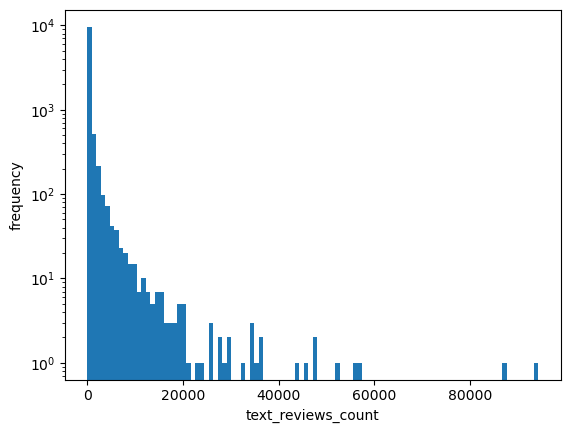

In [32]:
counts, bins = np.histogram(df.text_reviews_count, bins=100)
ax = plt.hist(bins[:-1], bins, weights=counts)
plt.xlabel('text_reviews_count')
plt.ylabel('frequency')
plt.yscale('log')

More than half the books have under 100 text reviews. However, some books have dozens of thousands of text reviews.

In [33]:
max(df.text_reviews_count )

94265

Number of books with **text_reviews_counts** less than 100.

In [34]:
len(df[df.text_reviews_count < 100])

6608

Percentage of books with **text_reviews_counts** less than 100.

In [35]:
round(len(df[df.text_reviews_count < 100])/len(df.text_reviews_count)*100)

61

Books with the most number of text reviews:

In [36]:
df.sort_values(by='text_reviews_count', ascending=False).head(10)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,
41865,Twilight (Twilight #1),Stephenie Meyer,3.59,eng,501,4597666,94265,9/6/2006,Little Brown and Company
19063,The Book Thief,Markus Zusak/Cao Xuân Việt Khương,4.37,eng,552,1516367,86881,3/14/2006,Alfred A. Knopf
3636,The Giver (The Giver #1),Lois Lowry,4.13,eng,208,1585589,56604,1/24/2006,Ember
865,The Alchemist,Paulo Coelho/Alan R. Clarke/Özdemir İnce,3.86,eng,197,1631221,55843,5/1/1993,HarperCollins
43641,Water for Elephants,Sara Gruen,4.09,eng,335,1260027,52759,5/1/2007,Algonquin Books
28187,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,4.25,eng,375,1766725,47951,3/1/2006,Disney Hyperion Books
19501,Eat Pray Love,Elizabeth Gilbert,3.55,eng,368,1362264,47620,2/1/2007,Riverhead Books
7445,The Glass Castle,Jeannette Walls,4.27,eng,288,808656,46176,1/17/2006,Scribner
5107,The Catcher in the Rye,J.D. Salinger,3.80,eng,277,2457092,43499,1/30/2001,Back Bay Books


### Ratings 

The Goodreads website allows users to give books a rating of 1 to 5 stars. 

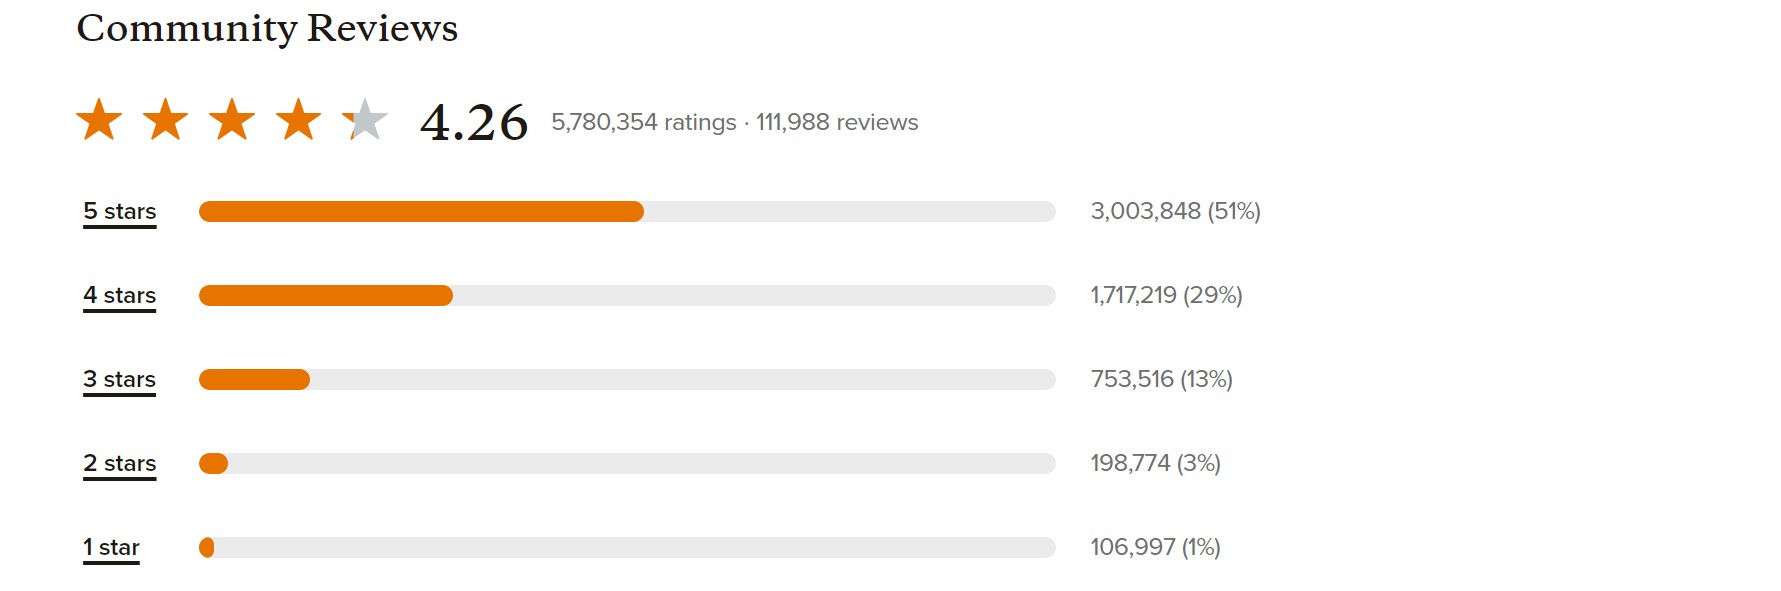

In [37]:
df[['average_rating']].describe()

,average_rating
count,10774.000000
mean,3.941899
std,0.293418
min,1.000000
25%,3.770000
50%,3.960000
75%,4.130000
max,5.000000


The describe() function shows that no rows have an **average_rating** below 1 or above 5, as expected.

The mean value for **average_rating** is 3.94, with a standard deviation of 0.29. 

Text(0, 0.5, 'frequency')

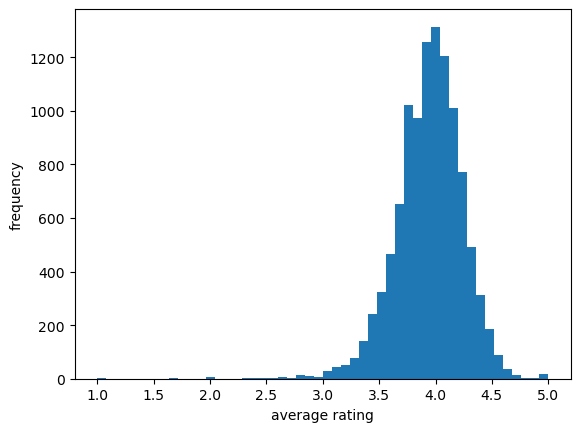

In [38]:
counts, bins = np.histogram(df.average_rating, range=[1,5], bins=50)
ax = plt.hist(bins[:-1], bins, weights=counts)
plt.xlabel('average rating')
plt.ylabel('frequency')

Testing for normality:

In [39]:
kstest(df.average_rating, 'norm')

KstestResult(statistic=0.995163915992716, pvalue=0.0)

Since the p-value is less than .05, the null hypothesis of the Kolmogorov-Smirnov test is rejected.

Therefore, **average_rating** does not follow a normal distribution. 

However, the skewness and the kurtosis can be used to check how close its distribution is from being normal.

In [40]:
df.average_rating.skew()

-0.6663436802157959

The distribution is slightly skewed to lower ratings.

In [41]:
df.average_rating.kurtosis()

3.08614954896208

*Kurtosis obtained using Fisher’s definition of kurtosis (kurtosis of normal == 0.0).*
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.kurtosis.html

This high kurtosis value could indicate **outliers**. Only very few books have received 1 or 2 stars.

Let's consider that a book needs to have at least a few votes for the rating given to be accurate. 
However, care should be taken to not remove too much data.

Number of rows in which a book has a **ratings_count** < 10. 

In [42]:
len(df[df.ratings_count  < 10])

552

Percentage of total data:

In [43]:
percentage_data = len(df[df.ratings_count < 10])/11127 *100
percentage_data

4.960905904556484

In [44]:
df[df.ratings_count  < 10]

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,
54,Molly Hatchet - 5 of the Best,Molly Hatchet,4.33,eng,56,6,0,6/10/2003,Cherry Lane Music Company
138,eBay: Top 100 Simplified Tips & Tricks,Julia Wilkinson,4.27,eng,260,9,0,6/6/2006,Wiley
201,Una arruga en el tiempo – A Wrinkle in Time,Madeleine L'Engle,4.00,spa,205,6,1,6/1/1984,Turtleback Books
377,Salmon of Doubt: Hitchhiking the Galaxy One La...,Douglas Adams/Christopher Cerf,3.93,eng,336,5,0,7/1/2003,Turtleback Books
534,We Were Not Like Other People,Ephraim Sevela/Antonina W. Bouis,4.14,eng,216,1,0,1/1/1989,HarperCollins Publishers
...,...,...,...,...,...,...,...,...,...
45444,Going Potty,Eoin Colfer,3.14,eng,64,7,1,10/1/1999,O'Brien Press
45450,La última oportunidad,Eoin Colfer,3.77,spa,258,2,0,4/4/2006,Plaza y Janes
45516,The Die Broke Financial Problem Solver,Stephen M. Pollan/Mark LeVine,2.33,en-US,272,3,0,12/26/2000,William Morrow Paperbacks


Books that have been rated less than 10 times by users are dropped.  

In [45]:
df=df[df.ratings_count  >= 10]

In [46]:
len(df[df.ratings_count  < 10])

0

***
Testing for normality again:

In [47]:
kstest(df.average_rating, 'norm')

KstestResult(statistic=0.9967776286401542, pvalue=0.0)

Since the p-value is less than .05, the null hypothesis of the Kolmogorov-Smirnov test is still rejected and **average_rating** still does not follow a normal distribution. 

However, the skewness and the kurtosis can be checked again to see if we are closer to one.

***
Checking the skewness and kurtosis once more:

In [48]:
df.average_rating.skew()

-0.41221279218407536

The skewness is between -0.5 and +0.5. Now, the ratings distribution is highly simetrical.
***

In [49]:
df.average_rating.kurtosis()

0.7033944145356958

Now, the kurtosis is closer to zero.

The distribution is closer to being normal.

**We can assume that around 95% of ratings are in between 3.35 and 4.52 (mean +- two standard deviations).**

The users of Goodreads tend to grade well the books that they interact with, usually do not giving less than 3 stars.

In [50]:
df[['average_rating']].describe()

,average_rating
count,10222.000000
mean,3.944992
std,0.275582
min,2.400000
25%,3.780000
50%,3.960000
75%,4.130000
max,4.910000


Text(0, 0.5, 'frequency')

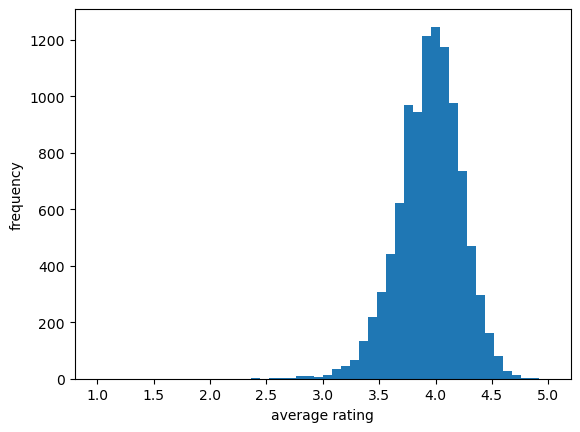

In [51]:
counts, bins = np.histogram(df.average_rating, range=[1,5], bins=50)
ax = plt.hist(bins[:-1], bins, weights=counts)
plt.xlabel('average rating')
plt.ylabel('frequency')

### Correlations

The heatmap below shows that the **average_rating** does not have linear correlation with the other numerical attributes.

The highest Pearson correlation coefficient between **average_rating** and another numerical attribute is 0.2 (**num_pages**).

The only attributes that are linearly correlated are **ratings_count** and **text_reviews_count**, with a Pearson correlation coefficient of 0.87. So books with higher **ratings_count** have a higher **text_reviews_count**.

<AxesSubplot:>

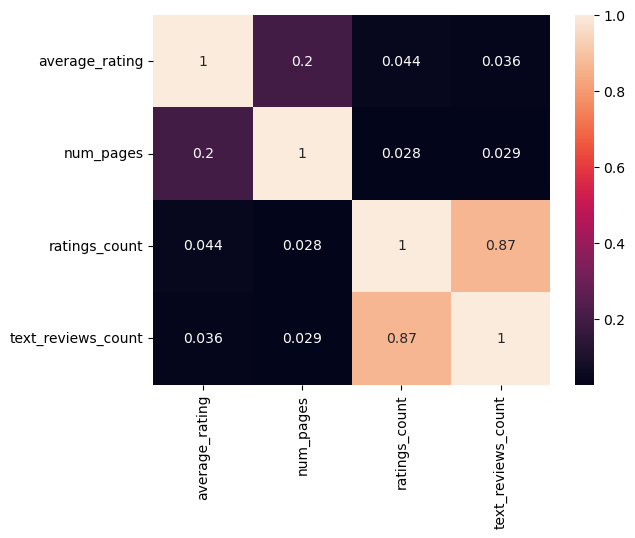

In [52]:
sns.heatmap(df.corr(numeric_only=True), annot = True)

The plots "Ratings Count vs Average Rating" and "Number of Pages vs Average Rating" bellow show that books with low **ratings_count** and low **num_pages** tend to have a wider distribution of **average_rating**.

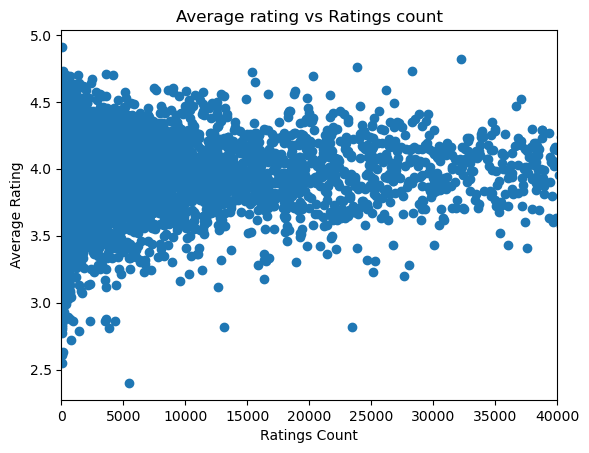

In [53]:
plt.scatter(df.ratings_count,df.average_rating)
plt.title("Average rating vs Ratings count")
plt.xlabel("Ratings Count")
plt.ylabel("Average Rating")
plt.xlim(0, 40000)
plt.show()

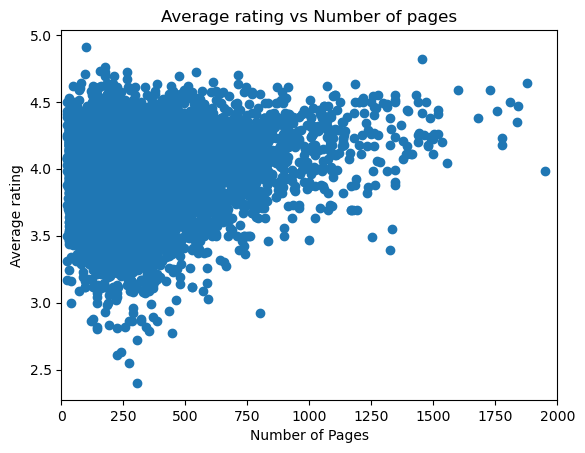

In [54]:
plt.scatter(df.num_pages,df.average_rating)
plt.title("Average rating vs Number of pages")
plt.xlabel("Number of Pages")
plt.ylabel("Average rating")
plt.xlim(0, 2000)
plt.show()

"Ratings Count vs Text Reviews Count" shows that books with higher **ratings_count** tend to have higher **text_reviews_count**, as expected given that a positive linear correlation was found previously.

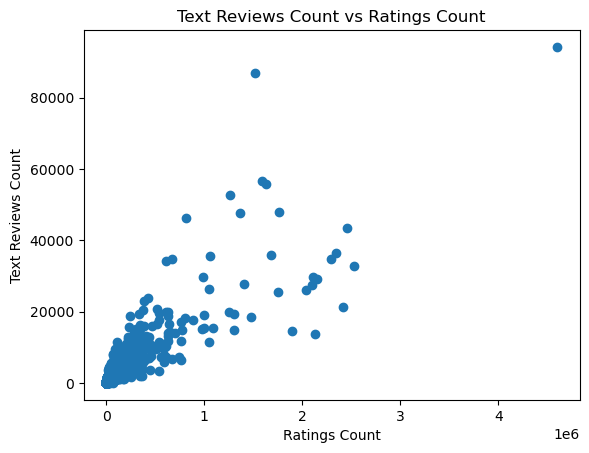

In [55]:
plt.scatter(df.ratings_count,df.text_reviews_count)
plt.title("Text Reviews Count vs Ratings Count")
plt.xlabel("Ratings Count")
plt.ylabel("Text Reviews Count")
plt.show()

## Categorical data

### Title

Top 10 books with the *highest* **average_rating**:

In [56]:
df.sort_values(by='average_rating', ascending=False).head(10)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,
15705,Existential Meditation,Simon Cleveland,4.91,eng,100,11,3,12/22/2005,Lulu.com
24812,The Complete Calvin and Hobbes,Bill Watterson,4.82,eng,1456,32213,930,9/6/2005,Andrews McMeel Publishing
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,9/13/2004,Scholastic
24814,It's a Magical World (Calvin and Hobbes #11),Bill Watterson,4.76,eng,176,23875,303,9/1/1996,Andrews McMeel Publishing
6550,Early Color,Saul Leiter/Martin Harrison,4.73,eng,156,144,8,1/15/2006,Steidl
10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,eng,3342,28242,808,9/12/2005,Scholastic
24816,Homicidal Psycho Jungle Cat (Calvin and Hobbes...,Bill Watterson,4.72,eng,176,15365,290,9/6/1994,Andrews McMeel Publishing
34545,Elliott Erwitt: Snaps,Murray Sayle/Charles Flowers/Elliott Erwitt,4.72,en-GB,544,102,6,6/1/2003,Phaidon Press
35561,The Beatles' Story on Capitol Records Part Tw...,Bruce Spizer,4.72,eng,264,29,0,1/1/2010,Four Ninety-Eight Productions


Top 10 books with the *lowest* **average_rating**:

In [57]:
df.sort_values(by='average_rating', ascending=False).tail(10)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,
39441,Challengers of the Unknown: Stolen Moments Bo...,Howard Chaykin/Michelle Madsen,2.82,eng,144,44,8,3/29/2006,DC Comics
16717,You Don't Love Me Yet,Jonathan Lethem,2.81,eng,225,3854,547,5/29/2007,Doubleday Books
20367,Ewan McGregor: From Junkie to Jedi,Brian J. Robb,2.80,eng,144,10,1,5/5/1999,Plexus Publishing
18829,Yellow Dog,Martin Amis,2.79,eng,352,1449,94,1/4/2005,Vintage
34892,Bright Star's Promise,Karen A. Bale,2.77,eng,444,13,3,7/1/1994,Zebra
18722,Alentejo Blue,Monica Ali,2.72,eng,304,788,104,6/20/2006,Scribner Book Company
36402,The Governess; or The Little Female Academy,Sarah Fielding/Candace Ward,2.63,eng,242,132,18,9/26/2005,Broadview Press Inc
34835,A Matter of Trust,Penny Jordan,2.61,eng,224,36,5,12/23/1994,Harlequin Presents
16021,The Trouble with the Pears: An Intimate Portra...,Gia Bathory Al Babel,2.55,eng,272,33,7,2/14/2006,Authorhouse


The **title** longtext data that is likely irrelevant for our model and will be dropped later in feature selection.

### Language

Checking what are the **language_code** values on the dataset and their frequency:

In [58]:
df.language_code.value_counts()

eng      8264
en-US    1333
en-GB     201
spa       174
fre        98
ger        54
jpn        30
mul        19
por        10
en-CA       7
grc         5
zho         5
ita         5
enm         3
lat         3
rus         2
nor         1
gla         1
tur         1
swe         1
nl          1
glg         1
msa         1
ara         1
ale         1
Name: language_code, dtype: int64

eng: English

en-US: English (US)

en-GB: English (Great Britain)

en-CA: English (Canada)

enm: English (Middle 1100-1500)

fre: French

spa: Spanish

grc: Greek

ger: German

jpn: Japanese

ara: Arabic

nl: Dutch

zho: Chinese

lat: Latin

por: Portuguese

ita: Italian

rus: Russian

msa: Malay

glg: Galician

wel: Welsh

swe: Swedish

nor: Norwegian

tur: Turkish

gla: Gaelic

ale: Aleut

mul: Multiple languages	

***
There are several codes for English (eng, en-US, en-GB, en-CA and enm), which will be grouped into a single category with **language_code** = eng. Languages other than English will also be grouped, with **language_code** = "other":

In [59]:
df.language_code.loc[df['language_code'].str.contains('en')] = 'eng'

In [60]:
df.language_code.loc[~df['language_code'].str.contains('en')]= 'other'

C:\Users\gabco\AppData\Local\Temp\ipykernel_18008\3267163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.language_code.loc[~df['language_code'].str.contains('en')]= 'other'


In [61]:
df.language_code.value_counts()

eng      9808
other     414
Name: language_code, dtype: int64

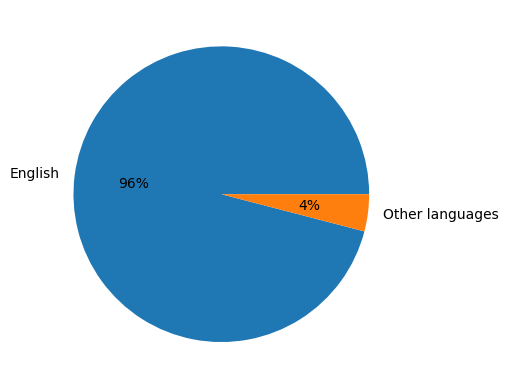

In [62]:
ax = plt.pie(df.language_code.value_counts(), labels=["English", "Other languages"], autopct='%.0f%%')


In [63]:
df.groupby('language_code').average_rating.describe()

,count,mean,std,min,25%,50%,75%,max
language_code,,,,,,,,
eng,9808.0,3.942781,0.275585,2.40,3.7800,3.96,4.13,4.91
other,414.0,3.997367,0.270597,3.06,3.8125,3.99,4.19,4.59


***

Only 4% of the books in the dataset have a language other than English. The dataset is extremely unbalanced in terms of languages. Additionally, the **average_rating** stats for books in languages other than English are very similar to the stats of the book in English. It seems unlikely that **language_code** will be a relevant feature for our model.

***

### Publication date

We will assume that the year given by the **publication_date** is of greater relevance than day and month. Therefore, **year** will be extracted from **publication_date**.

In [64]:
df['publication_year'] = df['publication_date'].str.extract(r'[0-9]+/[0-9]+/(.*)') 
#df.publication_year=pd.to_numeric(df.publication_year)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10222 entries, 1 to 45641
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               10222 non-null  object 
 1   authors             10222 non-null  object 
 2   average_rating      10222 non-null  float64
 3   language_code       10222 non-null  object 
 4   num_pages           10222 non-null  int64  
 5   ratings_count       10222 non-null  int64  
 6   text_reviews_count  10222 non-null  int64  
 7   publication_date    10222 non-null  object 
 8   publisher           10222 non-null  object 
 9   publication_year    10222 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 878.5+ KB


In [66]:
df

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year
bookID,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic,2003
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,2004
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,9/13/2004,Scholastic,2004
...,...,...,...,...,...,...,...,...,...,...
45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,eng,512,156,20,12/21/2004,Da Capo Press,2004
45633,You Bright and Risen Angels,William T. Vollmann,4.08,eng,635,783,56,12/1/1988,Penguin Books,1988
45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,eng,415,820,95,8/1/1993,Penguin Books,1993


The column **publication_date** will be dropped.

In [67]:
df = df.drop(columns=['publication_date'])

In [68]:
df

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publisher,publication_year
bookID,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,Scholastic Inc.,2006
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,Scholastic Inc.,2004
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,Scholastic,2003
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,Scholastic Inc.,2004
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,Scholastic,2004
...,...,...,...,...,...,...,...,...,...
45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,eng,512,156,20,Da Capo Press,2004
45633,You Bright and Risen Angels,William T. Vollmann,4.08,eng,635,783,56,Penguin Books,1988
45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,eng,415,820,95,Penguin Books,1993


In [69]:
df.publication_year.isna().sum()

0

***
Most books in the dataset were published in the early 2000s. 

In [70]:
df.publication_year.value_counts()

2006    1570
2005    1135
2004     971
2003     841
2002     730
        ... 
1919       1
1900       1
2020       1
1949       1
1940       1
Name: publication_year, Length: 85, dtype: int64

There is a big drop in counts in the dataset of books published after 2006.

Text(0, 0.5, 'frequency')

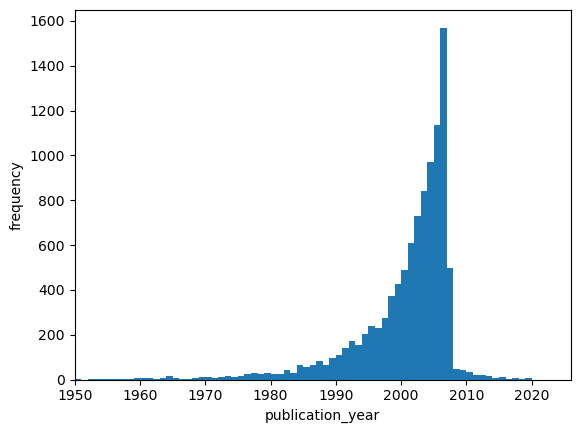

In [71]:
#x=np.array(df['publication_year'],dtype=float)
counts, bins = np.histogram(pd.to_numeric(df.publication_year), bins=120)
ax = plt.hist(bins[:-1], bins, weights=counts)
plt.xlim(1950,)
plt.xlabel('publication_year')
plt.ylabel('frequency')


***
The mean **average_rating** of the books do not vary much from one **publication_year** to another. 

Therefore, **publication_year** is unlikely to be a relevant feature.

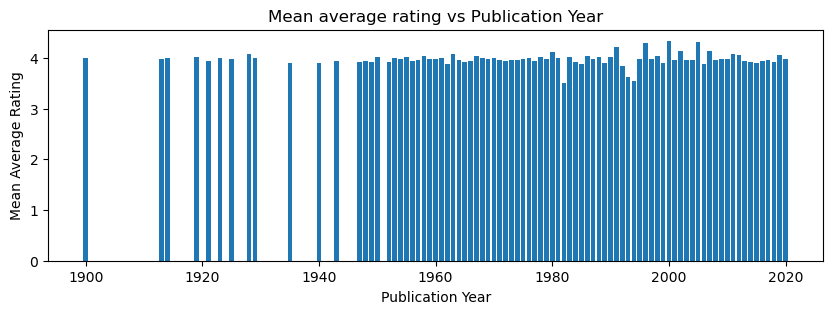

In [72]:
plt.figure(figsize=(10,3))
plt.bar(pd.to_numeric(df.publication_year).unique(),df.groupby('publication_year').average_rating.mean())
plt.title("Mean average rating vs Publication Year")
plt.xlabel("Publication Year")
plt.ylabel("Mean Average Rating")
plt.show()

### Authors

The authors column can contain 1 or more names. However, in several entries the first name cited is the main author. 

For example:

- The book **Harry Potter and the Half-Blood Prince** has **J.K. Rowling/Mary Grandpré** listed as authors. J.K. Rowling is the author and Mary Grandpré is the illustrator.
- The trilogy of **The Lord of the Rings** has **J.R.R. Tolkien/Alan  Lee** listed as authors.  J.R.R. Tolkien is the author and Alan  Lee is the illustrator.
- The book **Anna Karenina** has **Leo Tolstoy/Richard Pevear/Larissa Volokhonsky** listed as authors.  Leo Tolstoy is the author and Richard Pevear and Larissa Volokhonsky are translators.

For simplicity, we will assume that the first author mentioned has the most impact to the ratings given. 

Therefore, **main_author** will be extracted from **authors**.

In [73]:
df['main_author'] = df['authors'].str.extract(r'^([^/]+)') 

In [74]:
df.main_author=df.main_author.fillna(df['authors'])

Dropping **authors** column:


In [75]:
df = df.drop(columns=["authors"])

In [76]:
df

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publisher,publication_year,main_author
bookID,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,4.57,eng,652,2095690,27591,Scholastic Inc.,2006,J.K. Rowling
2,Harry Potter and the Order of the Phoenix (Har...,4.49,eng,870,2153167,29221,Scholastic Inc.,2004,J.K. Rowling
4,Harry Potter and the Chamber of Secrets (Harry...,4.42,eng,352,6333,244,Scholastic,2003,J.K. Rowling
5,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,eng,435,2339585,36325,Scholastic Inc.,2004,J.K. Rowling
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,eng,2690,41428,164,Scholastic,2004,J.K. Rowling
...,...,...,...,...,...,...,...,...,...
45631,Expelled from Eden: A William T. Vollmann Reader,4.06,eng,512,156,20,Da Capo Press,2004,William T. Vollmann
45633,You Bright and Risen Angels,4.08,eng,635,783,56,Penguin Books,1988,William T. Vollmann
45634,The Ice-Shirt (Seven Dreams #1),3.96,eng,415,820,95,Penguin Books,1993,William T. Vollmann


***

Top 10 authors with the *highest* **average_rating**:

In [77]:
#Sorting **main_author** by the mean **average_rating** of their books:
sortrating_author = df.groupby('main_author').mean(numeric_only=True).sort_values(by='average_rating', ascending=False).round(decimals=2)

In [78]:
sortrating_author.head(10).round(decimals=2)

,average_rating,num_pages,ratings_count,text_reviews_count
main_author,,,,
Simon Cleveland,4.91,100.00,11.00,3.00
Saul Leiter,4.73,156.00,144.00,8.00
Murray Sayle,4.72,544.00,102.00,6.00
Bruce Spizer,4.72,264.00,29.00,0.00
Bill Watterson,4.71,356.57,20685.57,318.86
David Allen Sibley,4.69,473.00,730.00,36.00
Frank Darabont,4.64,184.00,2406.00,29.00
Mercer Mayer,4.62,48.00,23.00,4.00
Charles Segal,4.62,440.00,12.00,0.00


In [79]:
#Gives a list of authors with top ratings
topratings_authors=sortrating_author.head(10).index.values

In [80]:
#Counting the number of times each author appears in the dataset
df.main_author[df.main_author.isin(topratings_authors)].value_counts()

Bill Watterson         7
Charles Segal          1
Saul Leiter            1
Mercer Mayer           1
Simon Cleveland        1
David Allen Sibley     1
Murray Sayle           1
Michael Littlefield    1
Bruce Spizer           1
Frank Darabont         1
Name: main_author, dtype: int64

The authors with top ratings have only 1 book in the dataset, with the exception of Bill Watterson (with 7).

***
Top 10 authors with the ***lowest average_rating***:

In [81]:
sortrating_author.tail(10)[::-1]

,average_rating,num_pages,ratings_count,text_reviews_count
main_author,,,,
Gia Bathory Al Babel,2.55,272.0,33.0,7.0
Sarah Fielding,2.63,242.0,132.0,18.0
Karen A. Bale,2.77,444.0,13.0,3.0
Brian J. Robb,2.80,144.0,10.0,1.0
Valerie Parv,2.83,192.0,23.0,1.0
Ted Bader,2.86,286.0,114.0,9.0
Gail Godwin,2.89,368.0,541.0,100.0
Penny Jordan,2.92,224.0,32.5,6.0
Catherine Hapka,2.93,176.0,195.0,11.0


In [82]:
#Gives a list of authors with lowest ratings
bottomratings_authors=sortrating_author.tail(10)[::-1].index.values

In [83]:
#Counting the number of times each author appears in the dataset
df.main_author[df.main_author.isin(bottomratings_authors)].value_counts()

Penny Jordan            2
Greg  Taylor            1
Ted Bader               1
Gia Bathory Al Babel    1
Brian J. Robb           1
Gail Godwin             1
Karen A. Bale           1
Sarah Fielding          1
Catherine Hapka         1
Valerie Parv            1
Name: main_author, dtype: int64

The authors with lowest ratings have only 1 book in the dataset, with the exception of Penny Jordan (with 2).

***
Top 10 authors with the **highest number of books** in the dataset:

In [84]:
df.main_author.value_counts().head(10)

William Shakespeare       80
Stephen King              69
J.R.R. Tolkien            48
P.G. Wodehouse            41
Mercedes Lackey           40
James Patterson           40
Orson Scott Card          38
Rumiko Takahashi          38
Margaret Weis             36
Gabriel García Márquez    36
Name: main_author, dtype: int64

In [85]:
#topcounts_authors = df.main_author.value_counts().loc[lambda x : x>30].index

#Selecting only the top 10 authors with the **highest numeber of books**:
topcounts_authors = df.main_author.value_counts().head(10).index

In [86]:
df.groupby('main_author').mean(numeric_only=True).loc[topcounts_authors].round(decimals=2)

,average_rating,num_pages,ratings_count,text_reviews_count
William Shakespeare,3.93,330.81,50612.80,599.22
Stephen King,4.00,484.67,56642.84,1044.13
J.R.R. Tolkien,4.21,530.98,116629.19,1301.85
P.G. Wodehouse,4.16,307.73,2353.85,136.24
Mercedes Lackey,4.00,417.98,8700.98,181.98
James Patterson,3.89,389.18,55786.12,1360.72
Orson Scott Card,3.79,404.89,20993.45,743.61
Rumiko Takahashi,4.19,221.71,1191.89,15.47
Margaret Weis,3.84,397.53,5377.97,61.00
Gabriel García Márquez,3.93,294.58,14680.83,604.78


In [87]:
df[df.main_author.isin(topcounts_authors)].groupby('main_author')[['average_rating']].agg([('count', np.count_nonzero), ('mean',np.mean), ('std',np.std)]).sort_values(('average_rating','count'), ascending=False).round(decimals=2)

average_rating            
                                count  mean   std
main_author                                      
William Shakespeare                80  3.93  0.20
Stephen King                       69  4.00  0.26
J.R.R. Tolkien                     48  4.21  0.26
P.G. Wodehouse                     41  4.16  0.16
James Patterson                    40  3.89  0.25
Mercedes Lackey                    40  4.00  0.14
Orson Scott Card                   38  3.79  0.27
Rumiko Takahashi                   38  4.19  0.11
Gabriel García Márquez             36  3.93  0.14
Margaret Weis                      36  3.84  0.25

Text(0.5, 0.98, 'Distribution of Average Rating per Author')

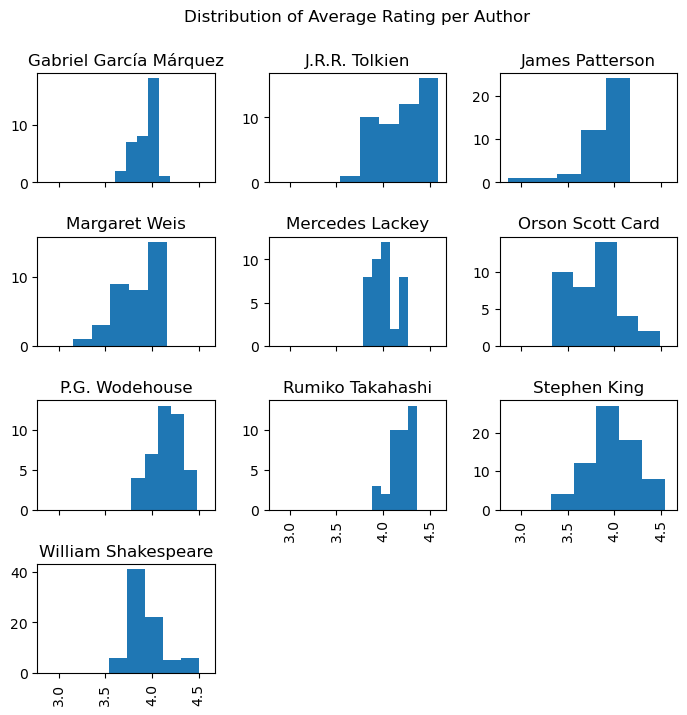

In [88]:
ax = df[df.main_author.isin(topcounts_authors)].hist('average_rating', by='main_author',  sharex=True,sharey=False, figsize=(8,8), bins =5)
plt.suptitle('Distribution of Average Rating per Author')

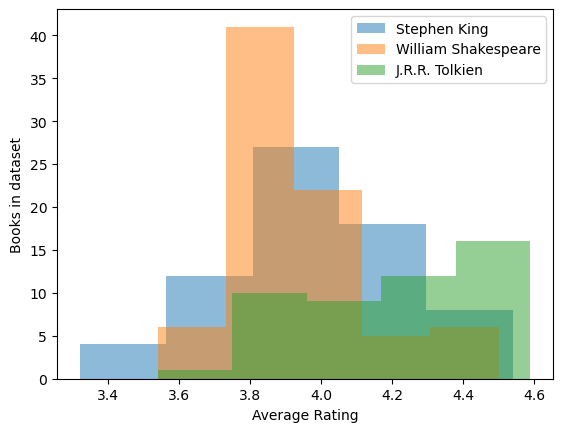

In [89]:
plt.hist(df[df.main_author == 'Stephen King']['average_rating'], 
         alpha=0.5, # the transaparency parameter
         label='Stephen King', bins= 5)   

plt.hist(df[df.main_author == 'William Shakespeare']['average_rating'], 
         alpha=0.5, # the transaparency parameter
         label='William Shakespeare', bins=5)
 
plt.hist(df[df.main_author == 'J.R.R. Tolkien']['average_rating'], 
         alpha=0.5, # the transaparency parameter
         label='J.R.R. Tolkien', bins=5)   
  
plt.legend(loc='upper right')
plt.xlabel("Average Rating")
plt.ylabel("Books in dataset")
plt.show()

### Publisher

In the **publisher** column, the name of one publisher can be found written in different formats. 
The column also contains names of different branches of the same parent publisher.

For example,

*Bloomsbury / Continuum*

*Bloomsbury Academic*

*Bloomsbury Arden Shakespeare*

*Bloomsbury Childrens Books*

*Bloomsbury Children's Books*

*Bloomsbury Methuen Drama*

*Bloomsbury Paperbacks*

*Bloomsbury Publishing*

*Bloomsbury Publishing PLC*

*Bloomsbury U.S.A. Children's Books*

*Bloomsbury UK*

*Bloomsbury USA*

*Bloomsbury USA Childrens*

*Bloomsbury USA Children's Books*

To see if the **publisher** affects the **average_rating** of a book of the dataset, it is desirable to group different spellings/branches under the same publisher name.

The strategy that will be adopted is to create a column **parent_publisher**.

The **parent_publisher** column will be filled with the first part of each name in **publisher**. For example, all publishers mentioned above will have *Bloomsbury* as **parent_publisher**.

For **publishers** names that begin with *The*, the second word will be considered the first part of the name. 

For example, *The MIT Press* has **parent_publisher** = *MIT*. 


It is important to note that while this strategy works for the majority of publishers in the dataset, it leads to mistakes in some cases.

Taking for example,

*Book of the Month Club*

*Book Publishing Company*

*Book Publishing Company (TN)*

All three would have “Book” as **parent_publisher**, but only the last two represent the same publisher. Another example is that some books published by HarperCollins gained “Harper” as **parent_publisher**, others “HarperCollins”.

Nevertheless, creating the column “parent_publisher” allows a better analysis of the distribution of average rating for each publisher.

In [90]:
df['parent_publisher'] = df['publisher'].str.extract(r'^[The\s]*([^\s]+)') 

In [91]:
df

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publisher,publication_year,main_author,parent_publisher
bookID,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,4.57,eng,652,2095690,27591,Scholastic Inc.,2006,J.K. Rowling,Scholastic
2,Harry Potter and the Order of the Phoenix (Har...,4.49,eng,870,2153167,29221,Scholastic Inc.,2004,J.K. Rowling,Scholastic
4,Harry Potter and the Chamber of Secrets (Harry...,4.42,eng,352,6333,244,Scholastic,2003,J.K. Rowling,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,eng,435,2339585,36325,Scholastic Inc.,2004,J.K. Rowling,Scholastic
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,eng,2690,41428,164,Scholastic,2004,J.K. Rowling,Scholastic
...,...,...,...,...,...,...,...,...,...,...
45631,Expelled from Eden: A William T. Vollmann Reader,4.06,eng,512,156,20,Da Capo Press,2004,William T. Vollmann,Da
45633,You Bright and Risen Angels,4.08,eng,635,783,56,Penguin Books,1988,William T. Vollmann,Penguin
45634,The Ice-Shirt (Seven Dreams #1),3.96,eng,415,820,95,Penguin Books,1993,William T. Vollmann,Penguin


In [92]:
df.publisher.value_counts()

Vintage                                    318
Penguin Books                              259
Penguin Classics                           183
Mariner Books                              147
Ballantine Books                           143
                                          ... 
Deodand                                      1
Dodd Mead; 1st edition (September 1976)      1
Inner Traditions                             1
Harlequin Superromance                       1
Globe                                        1
Name: publisher, Length: 2018, dtype: int64

In [93]:
df.parent_publisher.value_counts()

Penguin         583
Vintage         405
Harper          226
Bantam          194
Berkley         169
               ... 
Picture           1
Osprey            1
Globe             1
Morpheus          1
Panamericana      1
Name: parent_publisher, Length: 1191, dtype: int64

Keeping only **parent_publisher** and dropping **publisher**:

In [94]:
df = df.drop(columns=["publisher"])

In [95]:
df

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_year,main_author,parent_publisher
bookID,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,4.57,eng,652,2095690,27591,2006,J.K. Rowling,Scholastic
2,Harry Potter and the Order of the Phoenix (Har...,4.49,eng,870,2153167,29221,2004,J.K. Rowling,Scholastic
4,Harry Potter and the Chamber of Secrets (Harry...,4.42,eng,352,6333,244,2003,J.K. Rowling,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,eng,435,2339585,36325,2004,J.K. Rowling,Scholastic
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,eng,2690,41428,164,2004,J.K. Rowling,Scholastic
...,...,...,...,...,...,...,...,...,...
45631,Expelled from Eden: A William T. Vollmann Reader,4.06,eng,512,156,20,2004,William T. Vollmann,Da
45633,You Bright and Risen Angels,4.08,eng,635,783,56,1988,William T. Vollmann,Penguin
45634,The Ice-Shirt (Seven Dreams #1),3.96,eng,415,820,95,1993,William T. Vollmann,Penguin


***
Around 95% of the parent publishers have more than one book entry. 

In [96]:
df.parent_publisher.value_counts().sum()

10222

In [97]:
df.parent_publisher.value_counts().loc[lambda x: x==1].sum()

549

The parent publishers with the most books are:

In [98]:
top = df.parent_publisher.value_counts().loc[lambda x : x>140].index
top

Index(['Penguin', 'Vintage', 'Harper', 'Bantam', 'Berkley', 'HarperCollins',
       'Simon', 'Mariner', 'Ballantine', 'Oxford', 'Pocket', 'Random'],
      dtype='object')

Note that our strategy to group publishers was not perfect, since for example Harper and HarperCollins are the same publisher, and Random and Vintage are also branches of Penguin.

***

The top publishers have similar mean **average_rating** and standard deviation. 

In [99]:
grouped = df[df.parent_publisher.isin(top)].groupby('parent_publisher')
grouped[['average_rating']].agg([('count', np.count_nonzero), ('mean',np.mean), ('std',np.std)])

average_rating                    
                          count      mean       std
parent_publisher                                   
Ballantine                  148  3.887500  0.284779
Bantam                      194  3.907938  0.267702
Berkley                     169  3.904083  0.201844
Harper                      226  3.935221  0.247911
HarperCollins               167  3.994611  0.275962
Mariner                     148  3.940608  0.297891
Oxford                      143  3.910490  0.208250
Penguin                     583  3.929160  0.239583
Pocket                      142  3.913239  0.211065
Random                      142  3.939366  0.270883
Simon                       164  3.938415  0.247612
Vintage                     405  3.907284  0.257573

Text(0.5, 0.98, 'Distribution of Average Rating per Publisher')

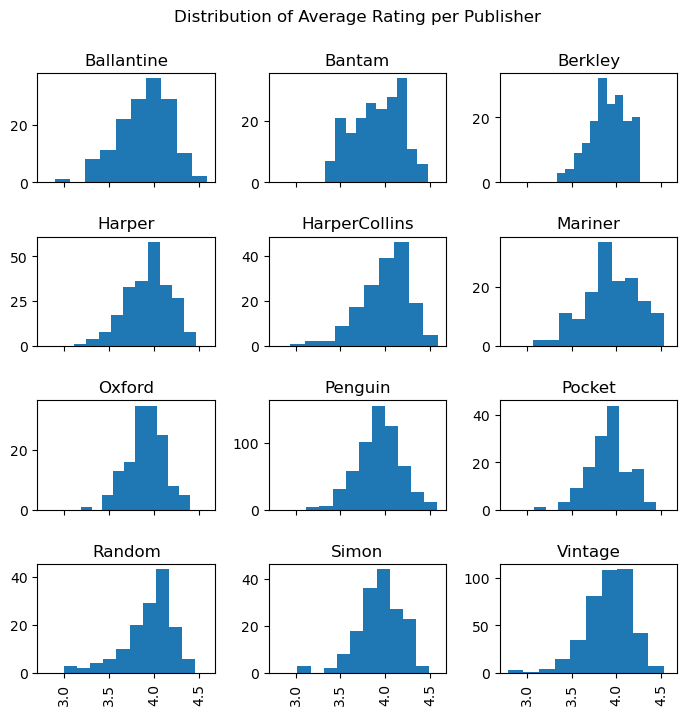

In [100]:
ax = df[df.parent_publisher.isin(top)].hist('average_rating', by='parent_publisher', sharex=True,sharey=False, figsize=(8,8))
plt.suptitle('Distribution of Average Rating per Publisher')

# Feature Selection


In this section, we will select some parameters that could potentially be relevant features for our machine learning model, discarding the ones we will not need any further.

***

**average_ rating** is out ***target*** feature - the one we will be trying to predict.

***

The **title** is longtext data that we will also not take into consideration in our model. 

Dropping title:


In [101]:
df = df.drop(columns=["title"])

***

Identification numbers such as **isbn** and **isbn13** were already previously discarded from the dataset.

***

Since 96% of the books in the dataset are written in English and the books in other languages maintain a similar mean and standard deviation for **average_rating**, language will not be chosen as a relevant feature. 

Dropping **language_code**:

In [102]:
df = df.drop(columns=["language_code"])

***

**num_pages** has a small positive linear correlation (Pearson's coefficient 0.20) and **ratings_count** seems to have no linear correlation (0.01) with the target **average_rating**. However, we will keep these features for now.

***

While **text_reviews_count** also had no correlation with the target, it was shown to be strongly correlated (0.8) to **ratings_count**. Since both features are correlated, we should use only one to train our model. Therefore, **text_reviews_count**  will be dropped:

Dropping **text_reviews_count**:

In [103]:
df = df.drop(columns=["text_reviews_count"])

***
Data is very unbalanced in terms **publication_year** and it does not seem to have meanful impact on the **average_rating**.

Dropping **publication_year**:

In [104]:
df = df.drop(columns=["publication_year"])

***
The average rating seems to depend more on **main_author** than **parent_publisher**, based on the descriptive statistics, but both will be kept for now. When to be used in a model, they will be submitted to further **encoding**.
***

The processed dataframe is as such:

In [105]:
df

,average_rating,num_pages,ratings_count,main_author,parent_publisher
bookID,,,,,
1,4.57,652,2095690,J.K. Rowling,Scholastic
2,4.49,870,2153167,J.K. Rowling,Scholastic
4,4.42,352,6333,J.K. Rowling,Scholastic
5,4.56,435,2339585,J.K. Rowling,Scholastic
8,4.78,2690,41428,J.K. Rowling,Scholastic
...,...,...,...,...,...
45631,4.06,512,156,William T. Vollmann,Da
45633,4.08,635,783,William T. Vollmann,Penguin
45634,3.96,415,820,William T. Vollmann,Penguin


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10222 entries, 1 to 45641
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   average_rating    10222 non-null  float64
 1   num_pages         10222 non-null  int64  
 2   ratings_count     10222 non-null  int64  
 3   main_author       10222 non-null  object 
 4   parent_publisher  10222 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 479.2+ KB


Saving the processed data frame:

In [107]:
df.to_csv("books_processed.csv",sep=",",index="True")